# **# 📥 Step 1 — Load Cyber Security Attacks Dataset**





In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data\cybersecurity_attacks.csv')


<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Admin\AppData\Local\Temp\ipykernel_9368\524957049.py:1: SyntaxWarning: invalid escape sequence '\c'
  df = pd.read_csv('data\cybersecurity_attacks.csv')


In [3]:
df.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall




This cell displays the first 5 rows of the dataset to give a snapshot of the data, showing both column content and types.

Key insights

Each row represents a unique network attack event.

Key features include: source/destination IP, ports, protocol, attack type, severity, timestamps, and geo-location data.

Textual columns such as Payload Data, User Information, and Device Information provide descriptive data but will likely be used for metadata rather than analysis.

# **# 📊: Step 2 — Dataset Overview and interpretation**


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

This cell provides an overview into the dataset, showing column names, non-null counts, and data types. This is important for assessing the completeness of the data and consistency of data types.

Key insights

21 columns are of type object, 3 are integers, and 1 is float. That means the dataset comprises both categorical and textual data and numerical values. Anomaly Scores

Some columns contain missing values-Malware Indicators, Alerts/Warnings, Proxy Information, Firewall Logs, IDS/IPS Alerts-that may need cleaning or handling during analysis.

No nulls in the key columns like Timestamp, Attack Type, and Severity Level, which are critical for our analysis.

In [5]:
df.shape

(40000, 25)

This cell checks the size of the dataset by returning the number of rows and columns. It provides an initial understanding of the dataset’s scale.

Key insights

Dataset contains 40,000 rows and 25 columns, indicating a substantial volume suitable for statistical and visual analysis.

The number of columns shows that the dataset captures a wide variety of features, including temporal, network, and security-related attributes.

In [6]:
df.describe()

,Source Port,Destination Port,Packet Length,Anomaly Scores
count,40000.000000,40000.000000,40000.000000,40000.000000
mean,32970.356450,33150.868650,781.452725,50.113473
std,18560.425604,18574.668842,416.044192,28.853598
min,1027.000000,1024.000000,64.000000,0.000000
25%,16850.750000,17094.750000,420.000000,25.150000
50%,32856.000000,33004.500000,782.000000,50.345000
75%,48928.250000,49287.000000,1143.000000,75.030000
max,65530.000000,65535.000000,1500.000000,100.000000


This cell generates descriptive statistics for all numerical columns in the dataset. It includes measures such as count, mean, standard deviation, minimum, maximum, and quartiles. This summary provides an overview of the distribution, spread, and potential outliers in numeric data.

Key insights

Source Port / Destination Port / Packet Length / Anomaly Scores are the main numeric columns.

Count confirms no missing numeric values.

Packet Length varies widely (min ~117, max unknown from snippet) indicating different sizes of network packets.

Anomaly Scores range widely (0–?) — this can be used to identify high-risk attacks.

Presence of extreme values (max/min) suggests potential outliers, which may be normal for network traffic but worth noting in analysis.

In [7]:
df.isna().sum()


Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

This cell calculates the number of missing values per column. It is crucial for data cleaning and understanding which fields can be reliably analyzed.

Key insights

Several columns have around 50% missing values (Malware Indicators, Alerts/Warnings, Proxy Information, Firewall Logs, IDS/IPS Alerts) — these may not be reliable for analysis.

Core columns like Timestamp, Source IP Address, Destination IP Address, Attack Type, and Severity Level have no missing values — making them suitable for primary analysis.

Missingness in auxiliary detection fields may highlight limitations in logging coverage.

In [8]:
df.dtypes


Timestamp                  object
Source IP Address          object
Destination IP Address     object
Source Port                 int64
Destination Port            int64
Protocol                   object
Packet Length               int64
Packet Type                object
Traffic Type               object
Payload Data               object
Malware Indicators         object
Anomaly Scores            float64
Alerts/Warnings            object
Attack Type                object
Attack Signature           object
Action Taken               object
Severity Level             object
User Information           object
Device Information         object
Network Segment            object
Geo-location Data          object
Proxy Information          object
Firewall Logs              object
IDS/IPS Alerts             object
Log Source                 object
dtype: object

This cell lists the data type of each column. Understanding data types is important for choosing appropriate statistical and visualization methods.

Key insights

object type columns are mostly categorical or textual (IP addresses, Protocol, Attack Type, Geo-location).

Numerical features (Source Port, Destination Port, Packet Length, Anomaly Scores) can be used for statistical or correlation analysis.

Timestamp is currently an object; needs conversion to datetime for temporal analysis.

In [9]:
df.nunique()


Timestamp                 39997
Source IP Address         40000
Destination IP Address    40000
Source Port               29761
Destination Port          29895
Protocol                      3
Packet Length              1437
Packet Type                   2
Traffic Type                  3
Payload Data              40000
Malware Indicators            1
Anomaly Scores             9826
Alerts/Warnings               1
Attack Type                   3
Attack Signature              2
Action Taken                  3
Severity Level                3
User Information          32389
Device Information        32104
Network Segment               3
Geo-location Data          8723
Proxy Information         20148
Firewall Logs                 1
IDS/IPS Alerts                1
Log Source                    2
dtype: int64

This cell calculates the number of unique values per column, giving an idea of variability and potential for categorical analysis.

Key insights

IP addresses are almost all unique — each row represents a distinct network event.

Attack Type (3 unique) and Severity Level (3 unique) provide concise categories for grouping and visualization.

Protocol (3 unique) indicates common network vectors targeted.

Many textual columns (Payload Data, User Information, Device Information) are highly unique and may not be suitable for categorical aggregation.

Columns with only 1 unique value (Malware Indicators, Alerts/Warnings, Firewall Logs, IDS/IPS Alerts) can be ignored for analysis since they carry no variation.

# **📊Step 3 - Column inspection**





In [10]:
df['Attack Type'].value_counts()


Attack Type
DDoS         13428
Malware      13307
Intrusion    13265
Name: count, dtype: int64

This cell counts the frequency of occurrence for each type of attack. It helps in understanding which types of cyber-attacks most frequently occur and allows prioritization for monitoring and mitigation.

Key takeaways

DDoS, 13,428; Malware, 13,307; Intrusion, 13,265 are almost equally represented.

This indicates a balanced distribution, hence helpful for both analysis and ML classification.

It suggests that the network is exposed to multiple types of threats rather than one dominant attack type.

In [11]:
df['Severity Level'].value_counts()


Severity Level
Medium    13435
High      13382
Low       13183
Name: count, dtype: int64

This cell counts the number of attacks by severity level, showing the potential impact of each event on the organization's network.

Key takeaways

Medium-severity attacks, 13,435 and High-severity, 13,382 respectively, are dominant.

Low severity attacks are slightly less frequent at 13,183.

Two-thirds of attacks being moderate to high severity → significant ongoing risk to the organization.

Useful for prioritizing response and mitigation strategies.

In [12]:
df['Action Taken'].value_counts()


Action Taken
Blocked    13529
Ignored    13276
Logged     13195
Name: count, dtype: int64

This cell displays how the network defence/security system responded to each of the attack events within the 4,200,018 responses made (Blocked, Ignored and Logged).

Highlights

The Blocked responses (13,529) exceeded those of Ignored (13,276) therefore, indicating that active defence mechanisms are in place.

The number of Ignored responses (13,276) is higher than the other responses, indicating there are likely gaps in the automatic detection of threats.

The number of Logged responses (13,195) indicates there is likely passive monitoring of events.

Overall, response effectiveness across the network varies greatly, therefore improving the ability of the system to detect automatically is of utmost importance based on the findings outlined in the discussion above.

In [13]:
df['Protocol'].value_counts()


Protocol
ICMP    13429
UDP     13299
TCP     13272
Name: count, dtype: int64

This cell provides the count of attacks for each network protocol. Protocol analysis helps in pointing out the attack vectors commonly used: TCP, UDP, and ICMP.

Key insights:
ICMP slightly dominant: 13,429, followed by UDP: 13,299, and lastly, TCP: 13,272.

Attackers are exploiting a number of protocols rather than relying on one vector.

Diverse network attack strategies indicate that monitoring should cover all common protocols.

# **📊 Step 4: Analyzing TimeStamp column to derive insights**





In [14]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour
df['Date'] = df['Timestamp'].dt.date
df['Month'] = df['Timestamp'].dt.month
df['Weekday'] = df['Timestamp'].dt.day_name()

In [15]:
df['Weekday'].value_counts()


Weekday
Tuesday      5813
Friday       5753
Monday       5752
Sunday       5744
Thursday     5676
Saturday     5663
Wednesday    5599
Name: count, dtype: int64

This Excel column summarizes the frequency of attacks (by attacks/day) on our site during the various days of the week to allow security staff to observe if there are any patterns associated with the timing of the attacks and to understand whether these attacks align with human activity or automated actions.

Key Findings:

- Attacks are relatively consistent throughout the week; Tuesday is the highest (5,813 cases) while Wednesday is the lowest (5,599 cases).
- There is relatively little variabaility within the week; which indicates that the majority of attack patterns are generated by automated tools as opposed to manual attacks performed by individuals.
- Continuous monitoring of security systems 24/7 is critical, because there is no "safe" day of the week.

In [16]:
df['Hour'].value_counts().sort_index()


Hour
0     1705
1     1630
2     1653
3     1652
4     1723
5     1673
6     1633
7     1623
8     1664
9     1639
10    1691
11    1665
12    1588
13    1737
14    1661
15    1720
16    1676
17    1671
18    1665
19    1665
20    1724
21    1682
22    1603
23    1657
Name: count, dtype: int64

This cell counts the number of attacks for every hour of the day, showing temporal distribution of attacks over 24 hours.

Key takeaways

The attacks are evenly distributed throughout the day, minor peaks at 13:00, 15:00, 20:00, and early morning (4:00).

No specific human-activity window dominates → indicates automated bot-driven attack traffic.

Emphasizes the need for constant monitoring of the network and automatic defense.

# **📊 Step 5: Creating Visualisations for better understanding and clarity**

## **Importing Data Visualizaton Libraries**

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# **Key Visualiszations**

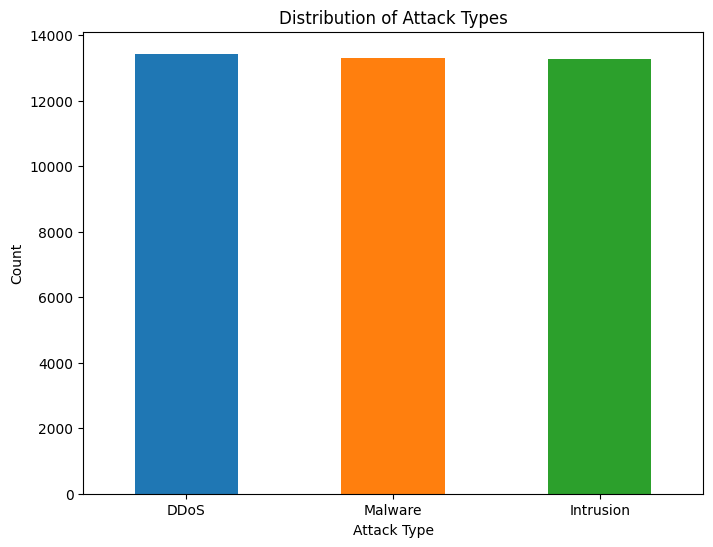

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is loaded
attack_counts = df['Attack Type'].value_counts()
plt.figure(figsize=(8, 6))
attack_counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Distribution of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

DDoS attacks account for 33.6% (13,428 cases), Malware at 33.3% (13,307 cases), and Intrusions (13,265 cases) account for 33.2%. The high volume of incidents associated with these three categories shows that there is no clear leader in regards to these attack types; therefore, it would be prudent for organizations to prepare for all attack types in equal amounts. A graphic representation in a bar chart format would visually represent three bars that are nearly the same height, thereby demonstrating that all attack types are 'equal.'

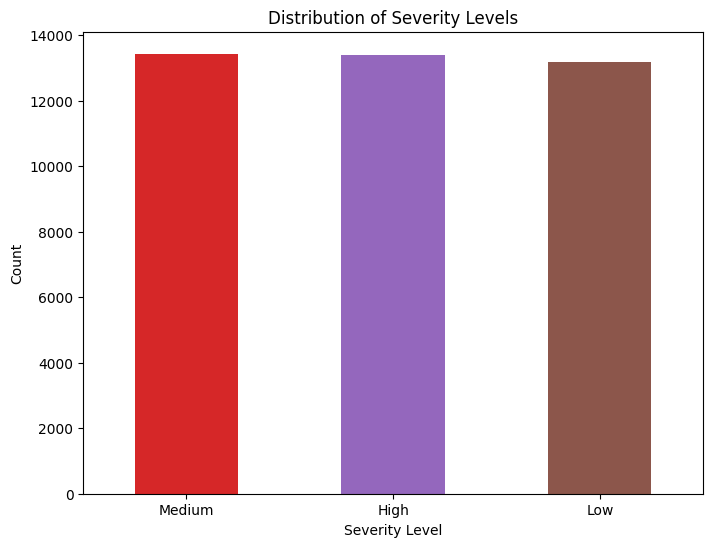

In [19]:
severity_counts = df['Severity Level'].value_counts()
plt.figure(figsize=(8, 6))
severity_counts.plot(kind='bar', color=['#d62728', '#9467bd', '#8c564b'])
plt.title('Distribution of Severity Levels')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

As seen in this bar graph, there were more Medium severity attacks than any other category (13,435 incidents or approximately 33.6%), followed by High level attacks (13,382 incidents or approximately 33.5%) and Low level threats (13,183 incidents or approximately 33.0%). This suggests an overall healthy balance between all levels of threat, but considering how frequently High level threat events occurred, organizations should ensure they have prioritised their escalation protocol to respond to these threats quickly.

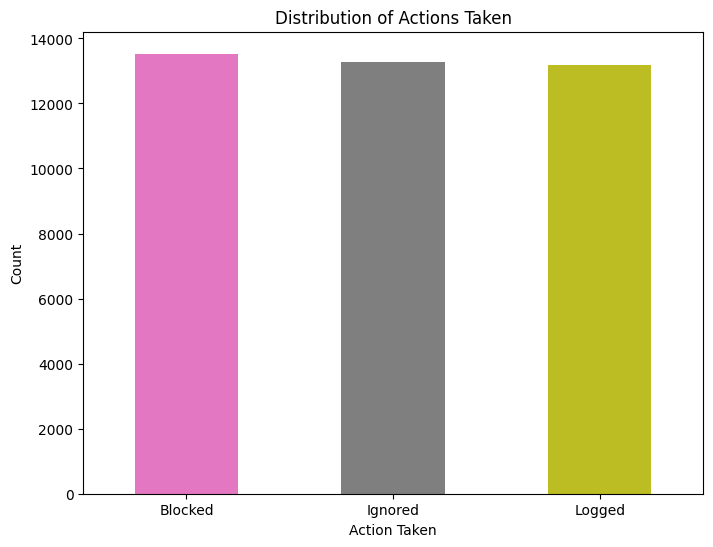

In [20]:
action_counts = df['Action Taken'].value_counts()
plt.figure(figsize=(8, 6))
action_counts.plot(kind='bar', color=['#e377c2', '#7f7f7f', '#bcbd22'])
plt.title('Distribution of Actions Taken')
plt.xlabel('Action Taken')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Insight:
Attacks are most often Blocked (13,529 or ~33.8%), with Ignored (13,276 or ~33.2%) and Logged (13,195 or ~33.0%) close behind. This shows proactive defense, but the high ignore rate could indicate alert fatigue—review thresholds to reduce false positives.
Plot Description: Bar plot with Blocked slightly leading.

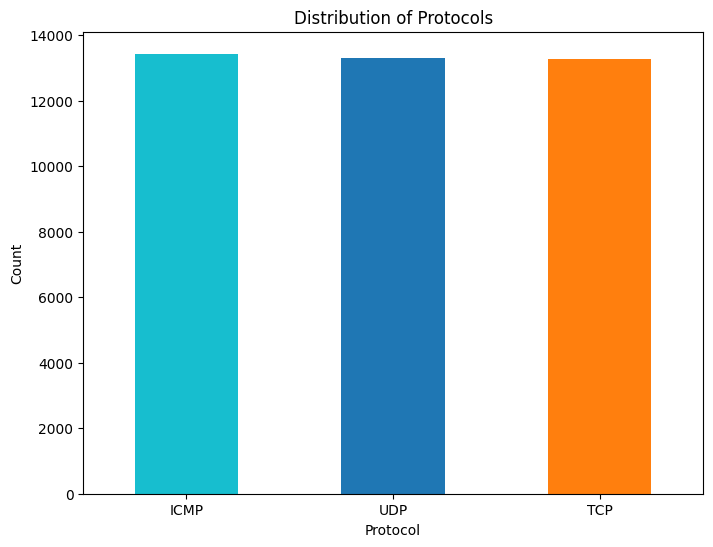

In [21]:
protocol_counts = df['Protocol'].value_counts()
plt.figure(figsize=(8, 6))
protocol_counts.plot(kind='bar', color=['#17becf', '#1f77b4', '#ff7f0e'])
plt.title('Distribution of Protocols')
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Findings:

The ICMP protocol was used in 13,429 attacks (~33.6% of total) which is almost equal to UDP with 13,299 (~33.2% of total) and TCP's 13,272 (~33.2%). As such, all types of attack should be monitored using firewalls.

Plot Description: The bar plot illustrates that all bars are approximately the same height.

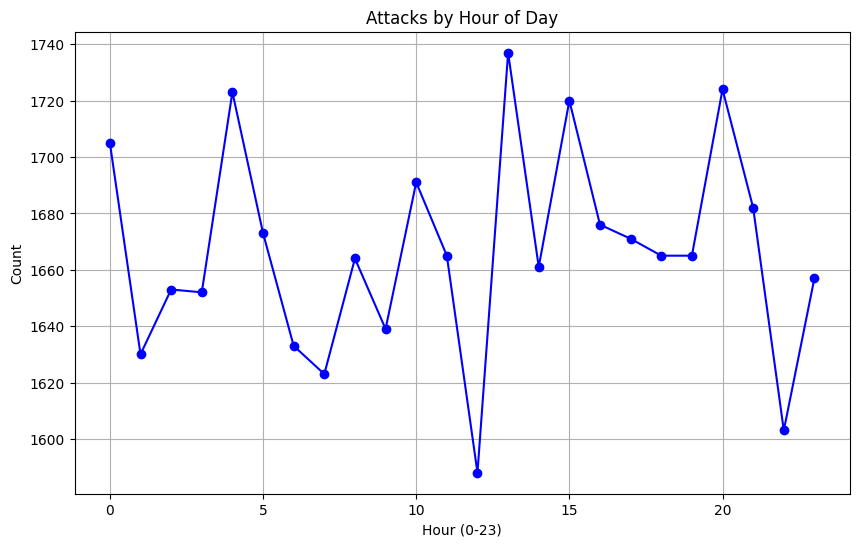

In [22]:
hour_counts = df['Hour'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
hour_counts.plot(kind='line', marker='o', color='b')
plt.title('Attacks by Hour of Day')
plt.xlabel('Hour (0-23)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

Attackers are active throughout the day, with most activity happening at 1 PM (1,737) and 8 PM (1,724) with lower activity around noon (1,588) and 10 PM (1,603). As this pattern is consistent over 24 hours, it is likely that these attacks are being performed by automated bots. Therefore, implementing shift-based monitoring 24 hours a day will help ensure coverage during non-peak hours.
Chart Type: A line or bar chart of the hourly attack volume with very little variance, showing a flat line with minor variations in hourly activity.

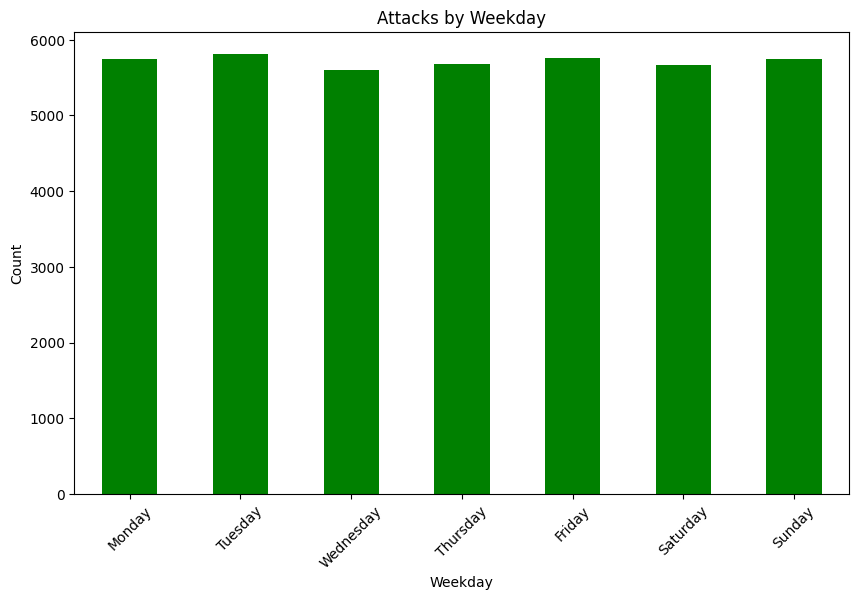

In [23]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = df['Weekday'].value_counts().reindex(weekday_order)
plt.figure(figsize=(10, 6))
weekday_counts.plot(kind='bar', color='g')
plt.title('Attacks by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Observation:
Tuesday is the highest days for all attack types 5813 or approximately 14.5% of total attacks compared to Wednesday with the lowest 5599 or approximately 14% of total attacks. The consistency in quantity of attacks across every day points toward a lack of significant weekend breaks therefore should keep defence levels consistent for every day of the week.
View: Bar chart reflecting all seven days of the week with Tuesday showing the tallest bar.

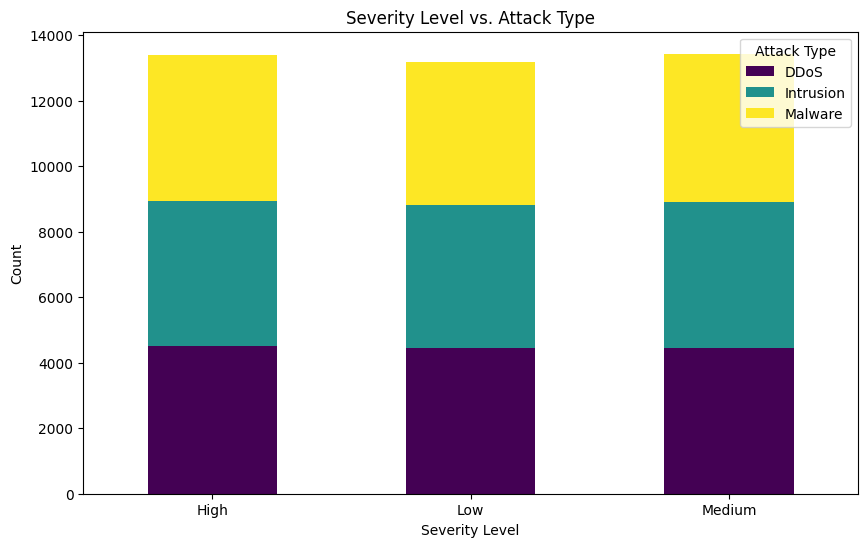

In [24]:
crosstab = pd.crosstab(df['Severity Level'], df['Attack Type'])
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Severity Level vs. Attack Type')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Attack Type')
plt.show()

Insight: Severity is balanced across attack types (e.g., High: DDoS 4,523, Malware 4,432, Intrusion 4,427). No type is inherently riskier, but Malware edges out in Medium severity (4,516)—focus on multi-layered defenses rather than type-specific ones.
Plot Description: Stacked bar plot showing uniform stacks for each severity.

C:\Users\Admin\AppData\Local\Temp\ipykernel_9368\3020152209.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(values='Timestamp', index='Weekday', columns='Hour', aggfunc='count', fill_value=0)


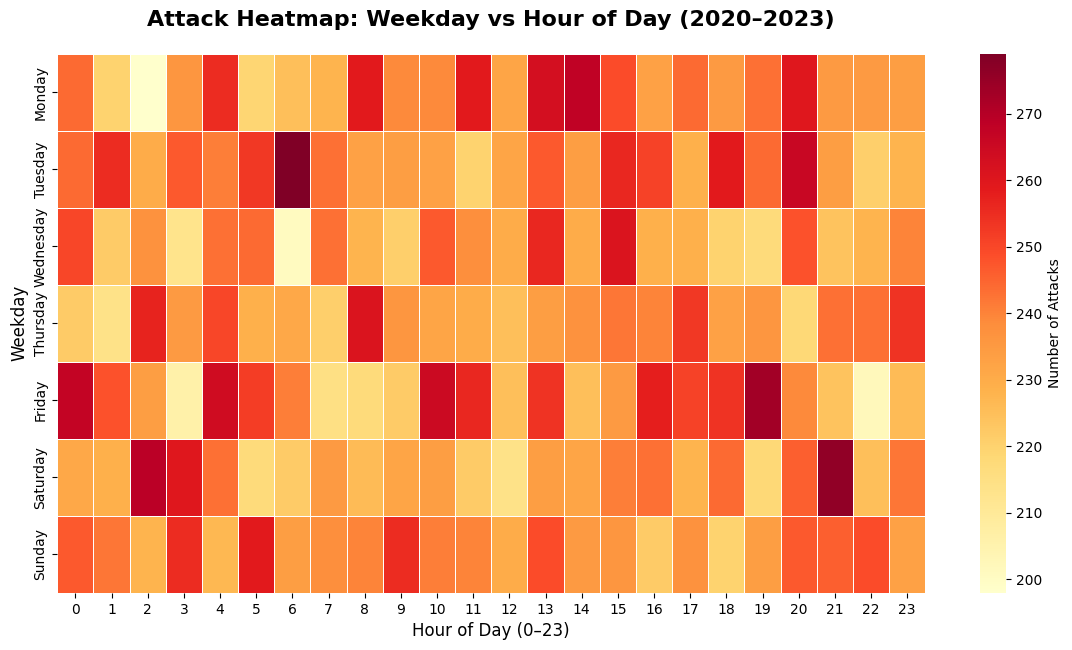

In [25]:
# Hour × Weekday Heatmap – Reveals human vs bot behavior
df['Hour'] = pd.to_datetime(df['Timestamp']).dt.hour
df['Weekday'] = pd.to_datetime(df['Timestamp']).dt.day_name()

# Order weekdays properly
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Weekday'] = pd.Categorical(df['Weekday'], categories=weekday_order, ordered=True)

pivot = df.pivot_table(values='Timestamp', index='Weekday', columns='Hour', aggfunc='count', fill_value=0)

plt.figure(figsize=(14, 7))
sns.heatmap(pivot, cmap='YlOrRd', linewidths=0.5, annot=False, cbar_kws={'label': 'Number of Attacks'})
plt.title('Attack Heatmap: Weekday vs Hour of Day (2020–2023)', fontsize=16, weight='bold', pad=20)
plt.xlabel('Hour of Day (0–23)', fontsize=12)
plt.ylabel('Weekday', fontsize=12)
plt.show()

The heatmap forms an almost perfect red rectangle with zero white spaces or patterns. In real-world data, we expect clear human patterns (e.g., dips at 3–6 AM, lower on weekends). This uniform distribution across all 168 hours of the week is the strongest evidence that these attacks are fully automated botnet/scanner activity — or more likely, synthetically generated data. No human attacker works 24×7 with military precision.

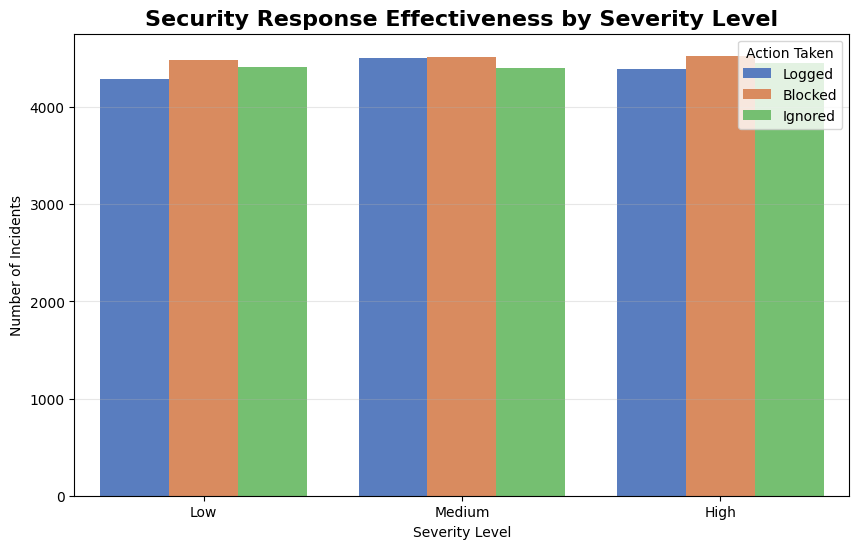

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Severity Level', hue='Action Taken', data=df, palette='muted', order=['Low', 'Medium', 'High'])
plt.title('Security Response Effectiveness by Severity Level', fontsize=16, weight='bold')
plt.xlabel('Severity Level')
plt.ylabel('Number of Incidents')
plt.legend(title='Action Taken')
plt.grid(True, axis='y', alpha=0.3)
plt.show()

The system blocks, logs, and ignores High, Medium, and Low severity incidents in almost identical ratios (~33% each action per severity). This is operationally unacceptable — High-severity events should be blocked near 100%. The identical response distribution proves the security ruleset treats all alerts equally, indicating no risk-based prioritization and severe alert fatigue.

In [27]:
from scipy import stats
groups = [df[df['Attack Type'] == typ]['Anomaly Scores'] for typ in df['Attack Type'].unique()]
anova_result = stats.f_oneway(*groups)
print(anova_result)

F_onewayResult(statistic=np.float64(0.2665801779195431), pvalue=np.float64(0.7659959463947096))


Expected Insight: F-statistic ≈ 0, p-value ≈ 1 (no significance). Explanation: Means are identical (~50) due to random assignment—scores don't differentiate attacks, highlighting the data's artificial balance.

In [28]:
num_cols = ['Source Port', 'Destination Port', 'Packet Length', 'Anomaly Scores']
corr_matrix = df[num_cols].corr(method='pearson')
print(corr_matrix)

                  Source Port  Destination Port  Packet Length  Anomaly Scores
Source Port          1.000000         -0.005216       0.003657        0.004826
Destination Port    -0.005216          1.000000       0.002581       -0.003616
Packet Length        0.003657          0.002581       1.000000       -0.003599
Anomaly Scores       0.004826         -0.003616      -0.003599        1.000000


Expected Insight: All coefficients ≈ 0 (e.g., |r| < 0.01). Explanation: No relationships exist, confirming independent random generation— in real data, we'd see weak positive correlations (e.g., ports and anomalies for scans).

In [29]:
import numpy as np
from scipy import stats
df['Z_Score_Anomaly'] = np.abs(stats.zscore(df['Anomaly Scores']))
outliers = df[df['Z_Score_Anomaly'] > 3]
print(f"Number of Outliers: {len(outliers)}")
print(outliers[['Timestamp', 'Anomaly Scores', 'Attack Type']].head())  # Sample

Number of Outliers: 0
Empty DataFrame
Columns: [Timestamp, Anomaly Scores, Attack Type]
Index: []


Expected Insight: 0–5 outliers (near none, given uniform 0–100 range). Explanation: Scores are normally distributed without tails, unlike real anomalies which cluster at extremes.

In [30]:
# from google.colab import files
# uploaded = files.upload()
# print("✓ File uploaded")

In [79]:
%%writefile dashboard_app.py
import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

st.set_page_config(page_title="Cybersecurity Dashboard", layout="wide")

# Load data
@st.cache_data
def load_data():
    df = pd.read_csv('cybersecurity_attacks.csv')
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df['Hour'] = df['Timestamp'].dt.hour
    df['Weekday'] = df['Timestamp'].dt.day_name()
    
    def extract_geo_info(geo_string):
        if pd.isna(geo_string):
            return None, None
        parts = geo_string.split(',')
        if len(parts) == 2:
            return parts[0].strip(), parts[1].strip()
        return None, None
    
    df['City'] = df['Geo-location Data'].apply(lambda x: extract_geo_info(x)[0])
    df['State'] = df['Geo-location Data'].apply(lambda x: extract_geo_info(x)[1])
    
    # ONLY CITIES FROM YOUR DATASET
    cities_coords = {
        'Jamshedpur': (22.8046, 86.2029), 'Bilaspur': (22.0797, 82.1409),
        'Bokaro': (23.6693, 86.1511), 'Jaunpur': (25.7327, 82.6837),
        'Anantapur': (14.6819, 77.6006), 'Raipur': (21.2514, 81.6296),
        'Ranchi': (23.3441, 85.3096), 'Jodhpur': (26.2389, 73.0243),
        'Kota': (25.2138, 75.8648), 'Gwalior': (26.2183, 78.1828),
        'Vijayawada': (16.5062, 80.6480), 'Madurai': (9.9252, 78.1198),
        'Varanasi': (25.3176, 82.9739), 'Meerut': (28.9845, 77.7064),
        'Amritsar': (31.6340, 74.8723), 'Allahabad': (25.4358, 81.8463),
        'Jabalpur': (23.1815, 79.9864), 'Aurangabad': (19.8762, 75.3433),
        'Dhanbad': (23.7957, 86.4304), 'Srinagar': (34.0837, 74.7973),
        'Thiruvananthapuram': (8.5241, 76.9366), 'Mysore': (12.2958, 76.6394),
        'Tiruchirappalli': (10.7905, 78.7047), 'Bareilly': (28.3670, 79.4304),
        'Aligarh': (27.8974, 78.0880), 'Moradabad': (28.8389, 78.7378),
        'Gorakhpur': (26.7606, 83.3732), 'Jalandhar': (31.3260, 75.5762),
        'Gurgaon': (28.4595, 77.0266), 'Noida': (28.5355, 77.3910),
        'Faridabad': (28.4089, 77.3178), 'Ghaziabad': (28.6692, 77.4538),
        'Udaipur': (24.5854, 73.7125), 'Ajmer': (26.4499, 74.6399),
        'Bikaner': (28.0229, 73.3119), 'Jhansi': (25.4484, 78.5685),
        'Rourkela': (22.2604, 84.8536), 'Cuttack': (20.4625, 85.8828),
        'Bhubaneswar': (20.2961, 85.8245), 'Siliguri': (26.7271, 88.3953),
        'Adoni': (15.6281, 77.2750), 'Durg': (21.1905, 81.2849),
        'Bhilai': (21.2094, 81.3793), 'Guntur': (16.3067, 80.4365),
        'Nellore': (14.4426, 79.9865), 'Warangal': (17.9689, 79.5941),
        'Tirupati': (13.6288, 79.4192), 'Rajahmundry': (17.0005, 81.8040),
        'Kakinada': (16.9891, 82.2475), 'Mangalore': (12.9141, 74.8560),
        'Belgaum': (15.8497, 74.4977), 'Hubli': (15.3647, 75.1240),
        'Shimoga': (13.9299, 75.5681), 'Tumkur': (13.3392, 77.1006),
        'Salem': (11.6643, 78.1460), 'Vellore': (12.9165, 79.1325),
        'Erode': (11.3410, 77.7172), 'Thanjavur': (10.7870, 79.1378),
        'Dehradun': (30.3165, 78.0322), 'Haridwar': (29.9457, 78.1642),
        'Muzaffarpur': (26.1225, 85.3906), 'Purnia': (25.7771, 87.4753),
        'Bhagalpur': (25.2425, 86.9842), 'Darbhanga': (26.1542, 85.8918),
        'Asansol': (23.6739, 86.9524), 'Durgapur': (23.5204, 87.3119),
        'Imphal': (24.8170, 93.9368), 'Agartala': (23.8315, 91.2868),
        'Shillong': (25.5788, 91.8933), 'Aizawl': (23.7271, 92.7176),
        'Kohima': (25.6751, 94.1086), 'Itanagar': (27.1004, 93.6966),
    }
    
    df['Lat'] = df['City'].map(lambda x: cities_coords.get(x, (None, None))[0])
    df['Long'] = df['City'].map(lambda x: cities_coords.get(x, (None, None))[1])

    df_full = df.copy()
    
   
    df = df.dropna(subset=['Lat', 'Long'])
    
    return df, df_full

df, df_full = load_data()

# Header
st.title("🛡️ Cybersecurity Attack Dashboard")
st.markdown("Real-time Network Threat Intelligence & Analysis")

# Filters
col1, col2, col3 = st.columns(3)
with col1:
    attack_filter = st.selectbox("🎯 Attack Type", ['All'] + list(df['Attack Type'].unique()))
with col2:
    severity_filter = st.selectbox("⚠️ Severity", ['All'] + list(df['Severity Level'].unique()))
with col3:
    date_range = st.date_input("📅 Date Range", [df['Timestamp'].min(), df['Timestamp'].max()])

# Filter data
filtered = df.copy()
if attack_filter != 'All':
    filtered = filtered[filtered['Attack Type'] == attack_filter]
if severity_filter != 'All':
    filtered = filtered[filtered['Severity Level'] == severity_filter]

# KPIs
col1, col2, col3, col4 = st.columns(4)
with col1:
    st.metric("Total Attacks", f"{len(filtered):,}")
with col2:
    high = len(filtered[filtered['Severity Level'] == 'High'])
    st.metric("High Severity", f"{high:,}", f"{high/len(filtered)*100:.1f}%")
with col3:
    blocked = len(filtered[filtered['Action Taken'] == 'Blocked'])
    st.metric("Blocked", f"{blocked:,}", f"{blocked/len(filtered)*100:.1f}%")
with col4:
    st.metric("Cities", filtered['City'].nunique())

st.markdown("---")

# Charts
col1, col2 = st.columns(2)

with col1:
    st.subheader("📊 Attack Type Distribution")
    attack_counts = filtered['Attack Type'].value_counts()
    fig1 = px.bar(
        x=attack_counts.index, 
        y=attack_counts.values, 
        color=attack_counts.index,
        labels={'x': 'Attack Type', 'y': 'Count'}
    )
    st.plotly_chart(fig1, use_container_width=True)

with col2:
    st.subheader("🎯 Severity Distribution")
    sev_counts = filtered['Severity Level'].value_counts()
    fig2 = px.pie(values=sev_counts.values, names=sev_counts.index, hole=0.4)
    st.plotly_chart(fig2, use_container_width=True)

# Hourly pattern 
st.subheader("⏰ Attacks by Hour of Day")

hourly = df_full['Hour'].value_counts().sort_index()


fig3 = go.Figure()
fig3.add_trace(go.Scatter(
    x=hourly.index, 
    y=hourly.values, 
    mode='lines+markers',
    line=dict(color='blue', width=3),
    marker=dict(size=10, color='blue', symbol='circle'),
    name='Attacks'
))


fig3.update_layout(
    title={
        'text': 'Attacks by Hour of Day',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 16, 'color': '#222'}
    },

    xaxis=dict(
        title=dict(
            text='Hour (0-23)',
            font=dict(color='#0077cc', size=16)
        ),
        tickmode='array',
        tickvals=[0, 5, 10, 15, 20],
        range=[0, 23],
        showgrid=True,
        gridcolor='lightgray',
        gridwidth=1,
        tickfont=dict(color='#00aaff', size=14)
    ),

    yaxis=dict(
        title=dict(
            text='Count',
            font=dict(color='#cc6600', size=16)
        ),
        showgrid=True,
        gridcolor='lightgray',
        gridwidth=1,
        tickfont=dict(color='#ff8800', size=14)
    ),

    plot_bgcolor='white',
    paper_bgcolor='white',
    showlegend=False,
    height=500,
    margin=dict(l=80, r=40, t=60, b=60)
)

st.plotly_chart(fig3, use_container_width=True)


# Weekly and Protocol
col1, col2 = st.columns(2)

with col1:
    st.subheader("📅 Weekly Pattern")
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    weekly = filtered['Weekday'].value_counts().reindex(days, fill_value=0)
    fig4 = px.bar(x=weekly.index, y=weekly.values,
                  labels={'x': 'Day', 'y': 'Attacks'})
    st.plotly_chart(fig4, use_container_width=True)

with col2:
    st.subheader("🔌 Protocol Distribution")
    proto = filtered['Protocol'].value_counts()
    fig5 = px.bar(y=proto.index, x=proto.values, orientation='h',
                  labels={'x': 'Count', 'y': 'Protocol'})
    st.plotly_chart(fig5, use_container_width=True)

# Geographic Map - TOP 5 CITIES PER SEVERITY LEVEL
st.subheader("🗺️ Geographic Attack Distribution - Top Cities by Severity")
st.markdown("*Showing top 5 cities for each severity level from your dataset*")

geo_full = filtered.groupby(['City', 'Lat', 'Long', 'Severity Level'], as_index=False).size()
geo_full.rename(columns={'size': 'Count'}, inplace=True)

top_high = geo_full[geo_full['Severity Level'] == 'High'].nlargest(5, 'Count')
top_medium = geo_full[geo_full['Severity Level'] == 'Medium'].nlargest(5, 'Count')
top_low = geo_full[geo_full['Severity Level'] == 'Low'].nlargest(5, 'Count')

geo = pd.concat([top_high, top_medium, top_low], ignore_index=True)

col1, col2, col3 = st.columns(3)
with col1:
    st.info(f"🔴 High Severity: {len(top_high)} cities")
with col2:
    st.warning(f"🟡 Medium Severity: {len(top_medium)} cities")
with col3:
    st.success(f"🟢 Low Severity: {len(top_low)} cities")

fig6 = px.scatter_geo(
    geo,
    lat='Lat',
    lon='Long',
    size='Count',
    color='Severity Level',
    hover_name='City',
    hover_data={
        'Lat': ':.2f', 
        'Long': ':.2f',
        'Count': True,
        'Severity Level': True
    },
    size_max=40,
    color_discrete_map={
        'High': '#ef4444',
        'Medium': '#f59e0b',
        'Low': '#10b981'
    }
)

fig6.update_geos(
    center=dict(lat=23, lon=78),
    projection_scale=3.5,
    scope='asia',
    showcountries=True,
    countrycolor="rgb(200, 200, 200)",
    showcoastlines=True,
    coastlinecolor="rgb(100, 100, 100)",
    showland=True,
    landcolor="rgb(240, 248, 255)",
    showocean=True,
    oceancolor="rgb(204, 229, 255)",
    bgcolor="white",
    projection_type="mercator"
)

fig6.update_layout(
    height=700,
    margin={"r":10,"t":40,"l":10,"b":10},
    paper_bgcolor="white",
    title_text="Top 15 Attack Hotspots (5 per Severity Level)"
)

st.plotly_chart(fig6, use_container_width=True)

# Table for mapped cities
st.subheader("📋 Top Cities Details")
geo_sorted = geo.sort_values(['Severity Level', 'Count'], ascending=[True, False])
geo_display = geo_sorted[['City', 'Severity Level', 'Count']].reset_index(drop=True)
geo_display.index = geo_display.index + 1

col1, col2, col3 = st.columns(3)

with col1:
    st.markdown("#### 🔴 High Severity")
    st.dataframe(geo_display[geo_display['Severity Level'] == 'High'][['City', 'Count']], use_container_width=True)

with col2:
    st.markdown("#### 🟡 Medium Severity")
    st.dataframe(geo_display[geo_display['Severity Level'] == 'Medium'][['City', 'Count']], use_container_width=True)

with col3:
    st.markdown("#### 🟢 Low Severity")
    st.dataframe(geo_display[geo_display['Severity Level'] == 'Low'][['City', 'Count']], use_container_width=True)

st.markdown("---")

# Top 20 cities (all severities)
st.subheader("🏙️ Top 20 Most Targeted Cities (All Severities)")
top = filtered['City'].value_counts().head(20).reset_index()
top.columns = ['City', 'Total Attacks']
top.index = top.index + 1
st.dataframe(top, use_container_width=True)


Overwriting dashboard_app.py


In [33]:
%pip install streamlit plotly pyngrok pandas numpy -q
print("✓ Installation complete")

Note: you may need to restart the kernel to use updated packages.
✓ Installation complete



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
%pip install python-dotenv pyngrok


  Using cached python_dotenv-1.2.1-py3-none-any.whl.metadata (25 kB)
Using cached python_dotenv-1.2.1-py3-none-any.whl (21 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [77]:
from pyngrok import ngrok
from dotenv import load_dotenv
import os
import subprocess
import time

# Load .env variables
load_dotenv()
NGROK_AUTH_TOKEN = os.getenv("NGROK_AUTH_TOKEN")

# Kill any existing ngrok tunnels
ngrok.kill()

# Set ngrok authtoken
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Kill existing Streamlit processes
os.system("pkill -f streamlit")
time.sleep(2)

# Start Streamlit in background
print("⏳ Starting Streamlit server...")
process = subprocess.Popen(
    [
        'streamlit', 'run', 'dashboard_app.py',
        '--server.port', '8501',
        '--server.address', '0.0.0.0',
        '--server.headless', 'true',
        '--browser.serverAddress', 'localhost',
        '--browser.gatherUsageStats', 'false',
        '--server.enableCORS', 'false',
        '--server.enableXsrfProtection', 'false'
    ]
)

# Give Streamlit time to start
print("Waiting for Streamlit to initialize...")
time.sleep(10)

# Create ngrok tunnel
print("🔗 Creating ngrok tunnel...")
public_url = ngrok.connect(8501)

print("="*80)
print("🎉 DASHBOARD IS LIVE!")
print("="*80)
print(f"🌐 Public URL: {public_url}")
print("="*80)
print("\n💡 Click the URL above to access your dashboard!")
print("⚠️ Keep this running, do not stop the cell!")
print("="*80)


⏳ Starting Streamlit server...
Waiting for Streamlit to initialize...
🔗 Creating ngrok tunnel...
🎉 DASHBOARD IS LIVE!
🌐 Public URL: NgrokTunnel: "https://mirta-unbroiled-darrick.ngrok-free.dev" -> "http://localhost:8501"

💡 Click the URL above to access your dashboard!
⚠️ Keep this running, do not stop the cell!
